# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [25]:
# make imports 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.stats import zscore
from pywt import scale2frequency
from pywt import cwt
from pywt import wavelist
import timeit
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})


In [26]:
# open lfp data
with open('data/moving_lfp.pickle', 'rb') as handle: 
    lfp_data = pickle.load(handle)  

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')


Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


## Filter the data in different frequency bands

Text(0.5, 1.0, 'Filtered Data - Beta Range (4th order Butterworth)')

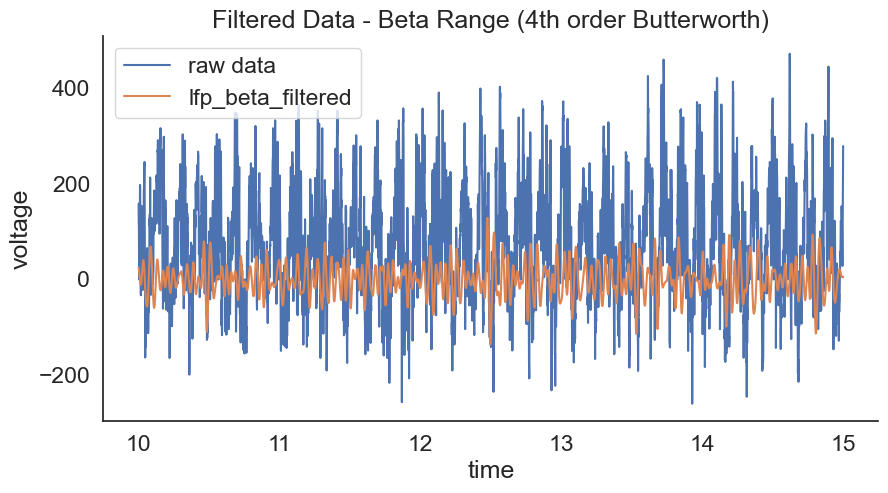

In [27]:
# filter in beta range (13-30Hz) using butterworth filter
filter_beta = signal.butter(4, [13, 30], btype='band', output='sos', fs = sampling_rate)

# apply the filter
lfp_filtered_beta = signal.sosfilt(filter_beta, lfp)

# construct time vector
lfp_time = np.linspace(10, 15, 5000)

# plot the filtered signal; but I am not sure whether I can solve it like this
plt.figure(figsize=(10, 5))
plt.plot(lfp_time, lfp[1000:6000], label = 'raw data')
plt.plot(lfp_time, lfp_filtered_beta[1000:6000], label = 'lfp_beta_filtered')
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend()
plt.title('Filtered Data - Beta Range (4th order Butterworth)')


Text(0.5, 1.0, 'Filtered Data - Gamma Range (4th order Butterworth)')

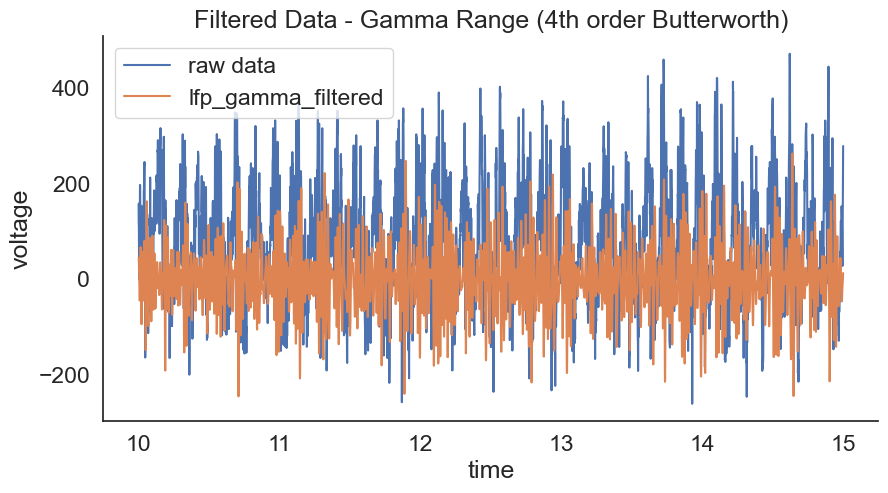

In [28]:
# filter in gamma range (30-100Hz) using butterworth filter
filter_gamma = signal.butter(4, [30, 90], btype='band', output='sos', fs = sampling_rate)

# apply the filter
lfp_filtered_gamma = signal.sosfilt(filter_gamma, lfp)

# construct time vector
lfp_time = np.linspace(10, 15, 5000)

# plot the filtered signal; but I am not sure whether I can solve it like this
plt.figure(figsize=(10, 5))
plt.plot(lfp_time, lfp[1000:6000], label = 'raw data')
plt.plot(lfp_time, lfp_filtered_gamma[1000:6000], label = 'lfp_gamma_filtered')
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend()
plt.title('Filtered Data - Gamma Range (4th order Butterworth)')

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


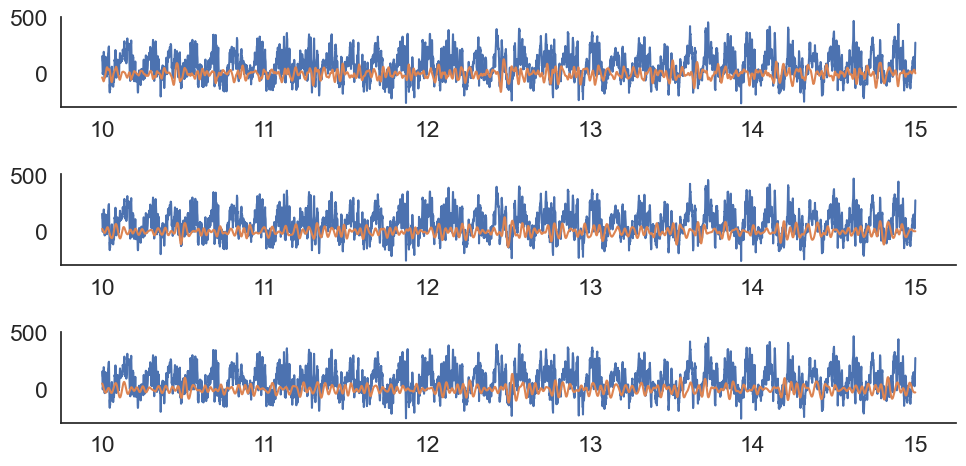

In [29]:
# filter in beta range (13-30Hz) - construct for-loop for different filter orders

filter_order = range(2, 10, 2)
# construct time vector
lfp_time = np.linspace(10, 15, 5000)

lfp_filtered_beta = []

for order in filter_order: 
    filter = signal.butter(order, [13, 30], btype='band', output = 'sos', fs = sampling_rate)
    filtered_lfp = signal.sosfilt(filter, lfp)
    lfp_filtered_beta.append(filtered_lfp)
    print(type(lfp_filtered_beta))

# plot the filtered signal
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
plt.plot(lfp_time, lfp[1000:6000], label = 'raw lfp')
plt.plot(lfp_time, lfp_filtered_beta[0][1000:6000], label = 'filter order 2')
plt.subplot(3,1,2)
plt.plot(lfp_time, lfp[1000:6000], label = 'raw lfp')
plt.plot(lfp_time, lfp_filtered_beta[1][1000:6000], label = 'filter order 4')
plt.subplot(3,1,3)
plt.plot(lfp_time, lfp[1000:6000], label = 'raw lfp')
plt.plot(lfp_time, lfp_filtered_beta[2][1000:6000], label = 'filter order 6')
plt.tight_layout()
# plt.plot(lfp_time, lfp_filtered_beta[1000:6000], label = 'lfp_beta_filtered')
# plt.xlabel('time')
# plt.ylabel('voltage')
# plt.legend()
# plt.title('Filtered data - using 4th order Butterworth filter')

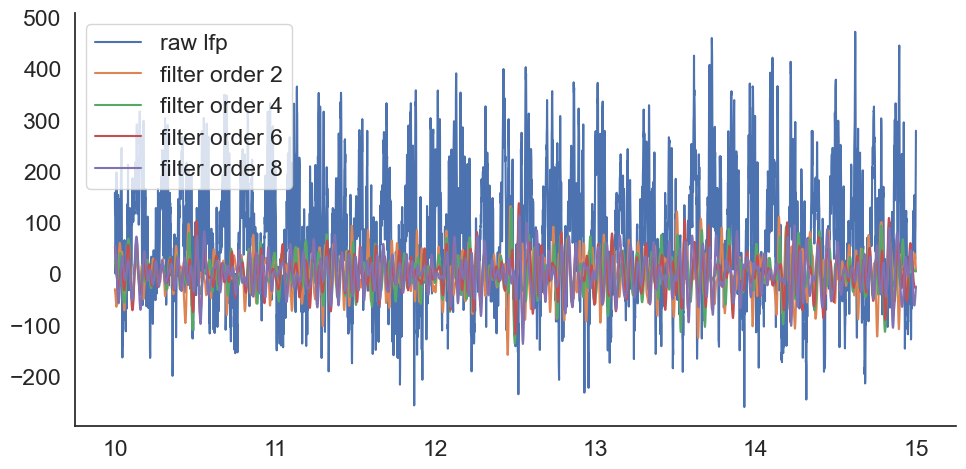

In [30]:
# plot everything in the same plot
plt.figure(figsize=(10, 5))
plt.plot(lfp_time, lfp[1000:6000], label = 'raw lfp')
plt.plot(lfp_time, lfp_filtered_beta[0][1000:6000], label = 'filter order 2')
plt.plot(lfp_time, lfp_filtered_beta[1][1000:6000], label = 'filter order 4')
plt.plot(lfp_time, lfp_filtered_beta[2][1000:6000], label = 'filter order 6')
plt.plot(lfp_time, lfp_filtered_beta[3][1000:6000], label = 'filter order 8')
plt.legend()
plt.tight_layout()

I am not sure whether the filter order actually makes a huge difference here.

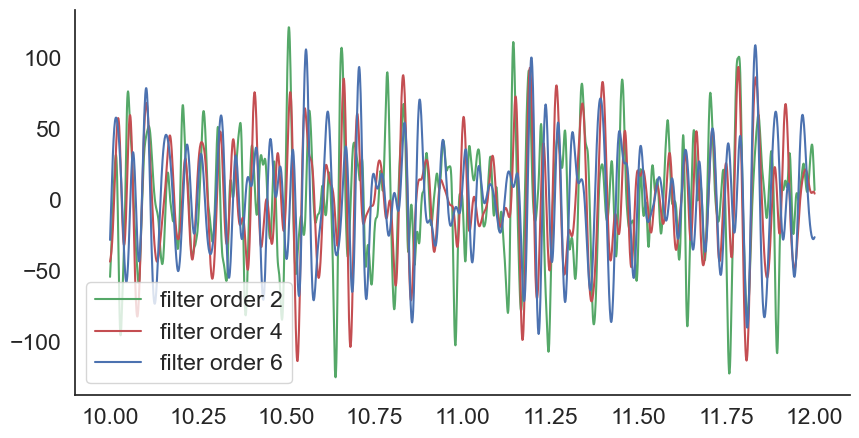

In [31]:
# only plot the band-pass filtered signals
lfp_time = np.linspace(10, 12, 2000)

plt.figure(figsize=(10, 5))
plt.plot(lfp_time, lfp_filtered_beta[0][4000:6000], 'g', label = 'filter order 2')
plt.plot(lfp_time, lfp_filtered_beta[1][4000:6000], 'r', label = 'filter order 4')
plt.plot(lfp_time, lfp_filtered_beta[2][4000:6000], 'b', label = 'filter order 6')
plt.legend()

**Interpretation**:  
Increasing the order of the filter seems to affect the bandpass-quality of the filter; i.e. how much frequencies outside the frequency range of interest will be eliminated.
As filter order is increased, the sharpness of the roll-off increases. But I am not sure what this means exactly.

Fix central frequency and play with width of frequency band. Not sure what this means...

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [32]:
# What units is lfp in?

# selct 2 seconds of signal
lfp_short = lfp[0:2000]

len(lfp_short) / sampling_rate

# create frequency vector
freq_short = fftfreq(len(lfp_short), 1/sampling_rate)
print(freq_short)

assert len(freq_short) == len(lfp_short)

[ 0.   0.5  1.  ... -1.5 -1.  -0.5]


Now that we have selected parts of the signal and created the frequency vector, we can compute a TF representation of power

In [33]:
# but first, we are going to demean the signal (to get rid of the 0 frequency component)

lfp_short = lfp_short - np.mean(lfp_short)

# perform time-frequency analysis using short fourier transform
lfp_short_fft = fft(lfp_short)

Next, we are only going to select the positive frequencies (up until the Nyquist frequency) and double the amplitude of those.

In [34]:
# select up to Nyquist frequency: do that both for the fourier transformed time series and the frequency vector

lfp_short_transformed = lfp_short_fft[:len(lfp_short)//2]

freq_short_transformed = freq_short[:len(lfp_short)//2]


# check that lfp_short_transformed and 
assert len(lfp_short_transformed) == len(freq_short_transformed)

lfp_abs = abs(lfp_short_transformed) ** 2

Now, we plot the time-frequency representation:

Text(0.5, 1.0, 'TRF')

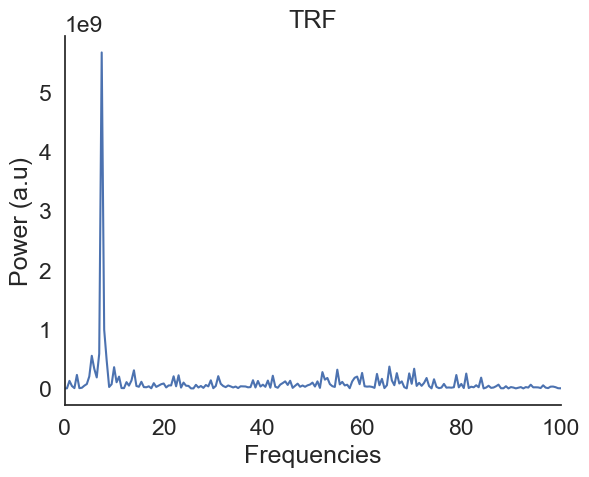

In [35]:
plt.figure()
plt.plot(freq_short_transformed, lfp_abs)
plt.xlim([0, 100])
plt.xlabel('Frequencies')
plt.ylabel('Power (a.u)')
plt.title('TRF')

Text(0.5, 1.0, 'Time-Frequency Representation - Wavelet Convolution')

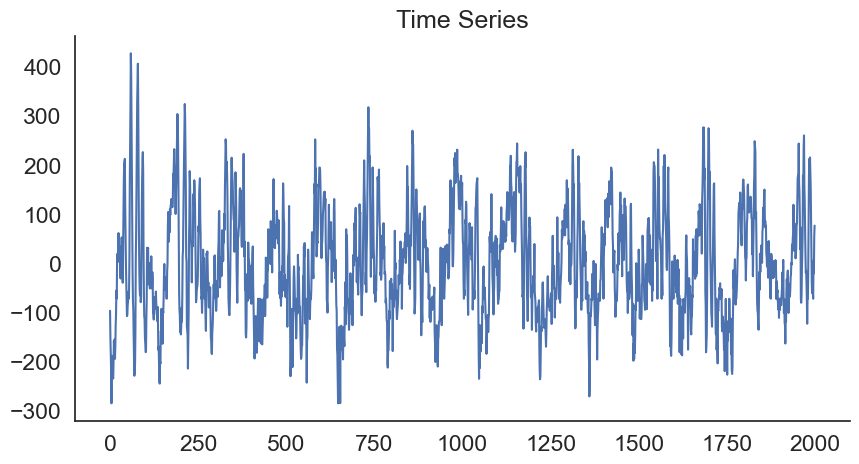

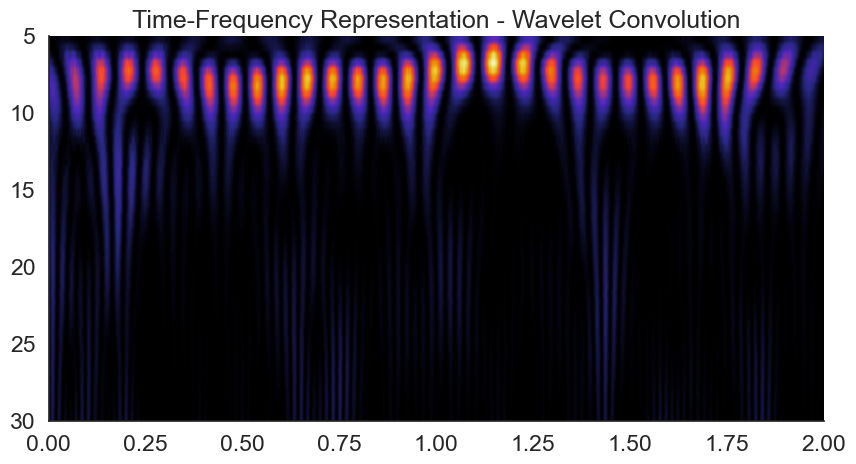

In [36]:
start = 0 #in seconds
end = 2 # in seconds

sig = lfp_short[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)
plt.title('Time Series')

#spectrogram with morlet transform with gaussian wavelet
frequencies =  np.linspace(5,30,50)/sampling_rate # how to choose the frequencies and respective spacing 
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.title('Time-Frequency Representation - Wavelet Convolution')

## Now, we use a different wavelet shape (but still a real value)

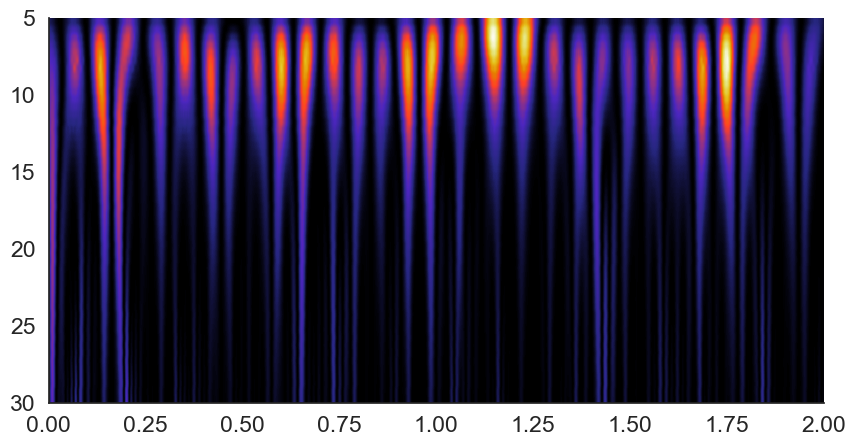

In [37]:
#spectrogram with morlet transform with mexican hat wavelet
frequencies =  np.linspace(5,30,50)/sampling_rate # how to choose the frequencies and respective spacing 
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr_comp, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr_comp)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

## Wavelet Transform with Complex Morlet Wavelet

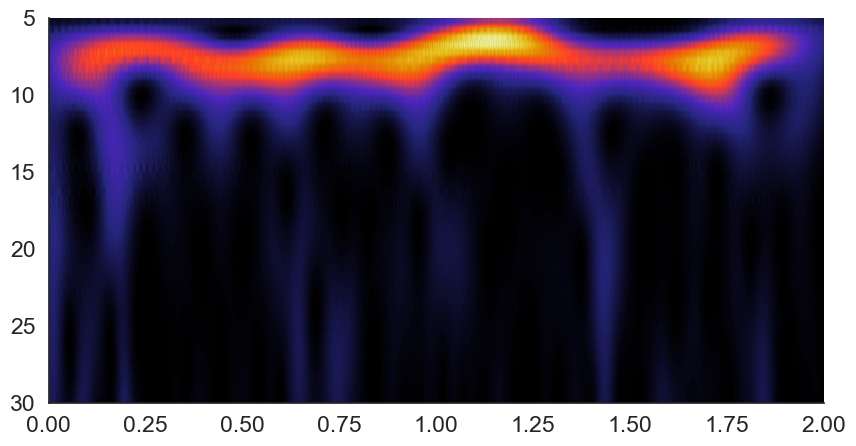

In [38]:
#spectrogram with morlet transform with gaussian wavelet
frequencies =  np.linspace(5,30,50)/sampling_rate # how to choose the frequencies and respective spacing 
wavelet = 'cmor-1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr_comp, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr_comp)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

Interpretation: Using complex-valued wavelets results in a smoother-looking (less stripey) time-frequency plot.
When we only use real-valued wavelets, we only extract magnitude information (but completely loose phase information).

In [39]:
# check available wavelets
wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

Text(0.5, 1.0, 'Complex Wavelet')

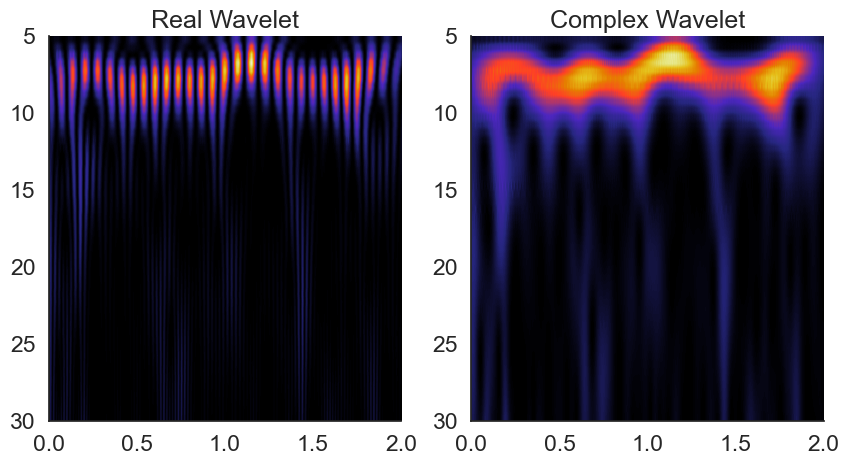

In [40]:
## Plot real and complex wavelets next to each other

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.title('Real Wavelet')
plt.subplot(1,2,2)
plt.imshow(abs(cwtmatr_comp)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.title('Complex Wavelet')

### Continous Wavelet Transform (NOtes to Myself)
This is just another way to do time-frequency analysis.

The `cwt` function: `pywt.cwt(data, scales, wavelet)` which computes the one dimensional Continuous Wavelet Transform.

What about the scales arguement?  
The scales determine the frequency resolution of the scaleogram.
Larger scales correspond to stretching of the wavelet.
The proper choice of scales depends on the chosen wavelet, so `pywt.scale2frequency()` should be used to get an idea of an appropriate range for the signal of interest.

The raw output of `cwt` is complex if a complex wavelet is used.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [41]:
with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

sleep_lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(sleep_lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')


Loaded 1816.576 seconds of LFP, sampled at 1000.0 Hz


Compute instantaneous power in theta and delta bands for the whole signal.

In [42]:
def compute_power(signal,sampling_rate, low_f, high_f):
    '''Takes lfp signal and sampling rate, returns instantaneous power in the specified band 
    '''
    signal = signal - np.mean(signal) # get rid of 0 frequency component


    frequencies =  np.linspace(low_f,high_f,20)/sampling_rate
    wavelet = 'cmor1.0-1.0'
    scales = scale2frequency(wavelet, frequencies)
    cwtmatr, _ = cwt(signal, wavelet=wavelet, scales=scales,
                    sampling_period=1.0/sampling_rate)


    power = np.mean(abs(cwtmatr)**2,axis=0)

    return power


In [43]:
theta_power = compute_power(sleep_lfp, sampling_rate, low_f=6, high_f=10)

In [44]:
# compute instantaneous delta power
delta_power = compute_power(sleep_lfp, sampling_rate, low_f=2, high_f=4)

2. z-score the two power signal (subtract mean and divide by standard deviation)

In [45]:
from scipy.stats import zscore

theta_zscored = zscore(theta_power)
delta_zscored = zscore(delta_power)

Compute and plot the power difference between theta and delta for the entire sleep session

1816576
1816576


Text(0, 0.5, 'power (a.u.)')

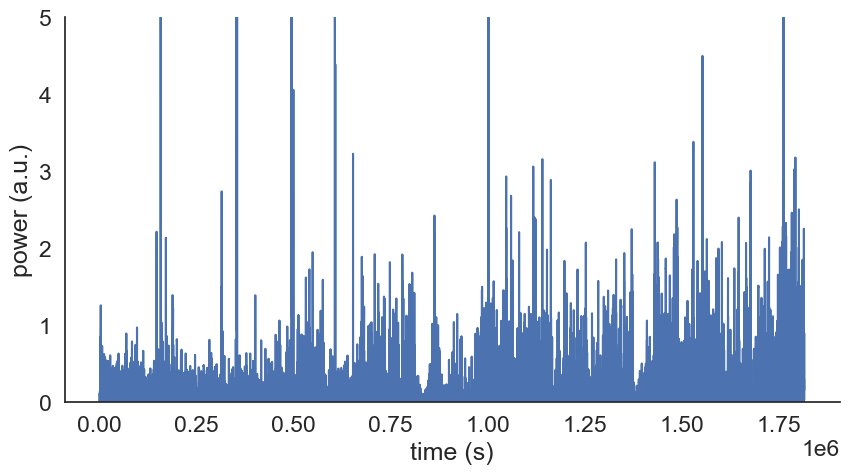

In [46]:
difference_theta_delta = theta_zscored-delta_zscored


print(len(difference_theta_delta))

print(len(np.arange(0, len(difference_theta_delta))))


# plot power against time (not sure if I am doing the correct thing here...)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,len(difference_theta_delta), len(difference_theta_delta)),difference_theta_delta)
plt.ylim([0, 5])
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')

Compute REM and nonREM sleep periods - my code doesn't work because it evaluates each time point and doesn't compute periods.
I guess, I can adapt the code that was used in the workshop.

In [54]:
rem_periods = []
nrem_periods = []
threshold = 2

for period in range(1, len(difference_theta_delta)):
    if period >= threshold:
        rem_periods.append(period)
    else: 
        nrem_periods.append(period)

In [56]:
print(len(nrem_periods))

1


## Plot examples of REM vs nREM lfp signals (wideband filtered between 1 and 200 Hz to get rid of some of the noise)
I need to somehow match the indexes from the frequency to the time domain.

In [ ]:
# this doesn't work
rem_filtered = lf.bandpass_filter(rem_periods,low_f=1,high_f=200, sampling_rate=sampling_rate)
nrem_filtered = lf.bandpass_filter(nrem_periods,low_f=1,high_f=200, sampling_rate=sampling_rate)


1


In [57]:
# define rem_idx function
def rem_idxs(rem_mask):
    '''
    Takes logical rem mask and returns a list of arrays. Each array correspond to a rem period
    and contains its time idxs (relative to the provided rem mask)
    '''
    rem_starts = []
    rem_ends = []
    for i in range(1, len(rem_mask)):
        if rem_mask[i-1] == 0 and rem_mask[i] == 1:
            rem_starts.append(i)
        if rem_mask[i-1] == 1 and rem_mask[i] == 0:
            rem_ends.append(i)

    # handle edge cases
    if len(rem_ends) > len(rem_starts):
        rem_starts = [0]+rem_starts  # if session starts with a rem

    if len(rem_ends) < len(rem_starts):
        rem_ends.append(len(rem_mask))  # if session ends with a rem

    rem = [np.arange(rem_starts[i], rem_ends[i])
               for i in range(len(rem_starts))]

    return rem


# define rem mask
rem_mask = np.asarray([True if x>threshold else 0 for x in difference_theta_delta])


rem_periods_new = rem_idxs(rem_mask)
print(f'detected {len(rem_periods_new)} rem events')

detected 76 rem events


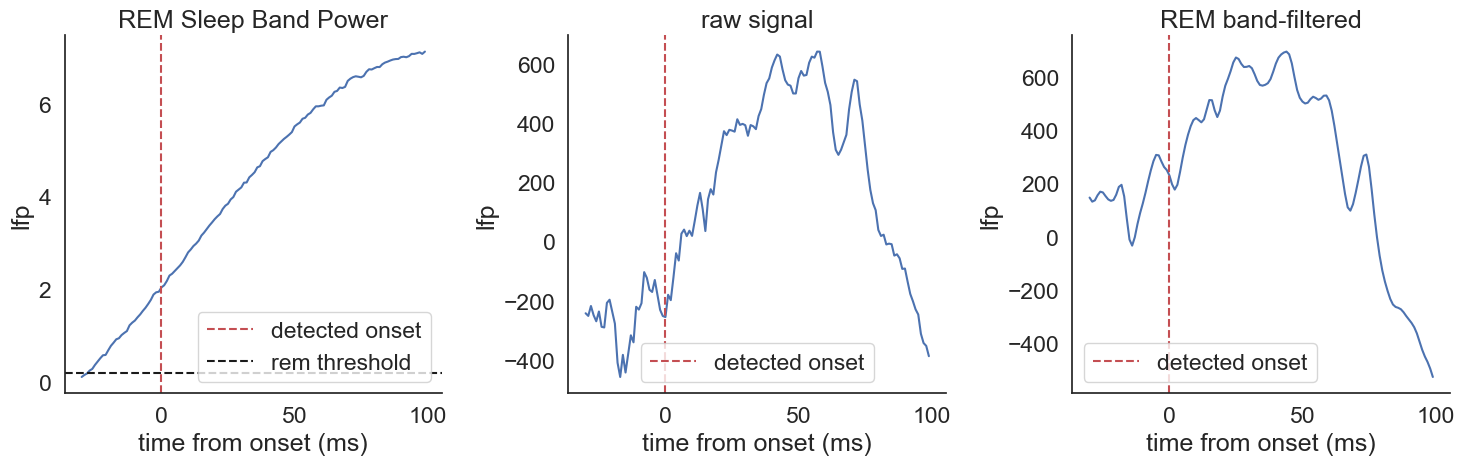

In [66]:
##  now I need to plot these events!!

rem_n = 1

rem_lfp = lf.bandpass_filter(sleep_lfp,low_f=1,high_f=200, sampling_rate=sampling_rate)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
onset = rem_periods_new[rem_n][0]
x = np.arange(-30,100)
y = difference_theta_delta[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.axhline(y=0.2,linestyle='--',c='k',label='rem threshold')

plt.title('REM Sleep Band Power')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()

plt.subplot(1,3,2)
onset = rem_periods_new[rem_n][0]
x = np.arange(-30,100)
y = sleep_lfp[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.title('raw signal')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()

plt.subplot(1,3,3)
onset = rem_periods_new[rem_n][0]
x = np.arange(-30,100)
y = rem_lfp[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.title('REM band-filtered')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()
plt.tight_layout()